In [7]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from crossgoose.models import CrossGooseModel

model  = CrossGooseModel.load_model(model='default')
model.eval();

loaded model from /mnt/zeus/bia/jmabon/CrossGoose/crossgoose/models/default/weights.ckpt


ran detection in 0.53s


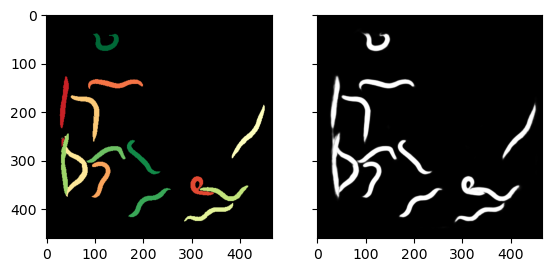

In [23]:
import time
from matplotlib import pyplot as plt
import numpy as np
from crossgoose.data import normalize_image
from crossgoose.mask_utils import relabel
from crossgoose.my_display import get_custom_mask_cmap
from crossgoose.utils import imread
import torch

image_path = "/mnt/zeus/bia/jmabon/data/CrossGoose/Dataset_v02/test/C11_img.tif"
image_normalization = 'M1P1'

image = imread(image_path)

if len(image.shape) == 3:
    chan_dim = np.argmin(image.shape)
    image = np.mean(image, axis=chan_dim)
h, w = image.shape
image = normalize_image(image, image_normalization)

image = torch.tensor(image)
image = image.unsqueeze(dim=0).unsqueeze(dim=0).float()
start = time.perf_counter()
results = model.segment_image(image=image)
end = time.perf_counter()
print(f"ran detection in {end-start:.2f}s")

cmap_mask = get_custom_mask_cmap()
fig,axs = plt.subplots(1,2,sharex=True,sharey=True)
axs[0].imshow(relabel(results['mask'],shuffle=True),cmap=cmap_mask)
axs[1].imshow(results['cellprob'],cmap='gray')